In [7]:
import dask.dataframe as dd
import pandas as pd

# 데이터 타입 지정
dtypes = {col: 'float32' for col in needed_columns[1:]}  # BAS_YH 제외한 숫자형 컬럼
dtypes['BAS_YH'] = 'category'

# 데이터 읽기
ddf = dd.read_csv('/content/edu_data_F.csv', usecols=needed_columns, dtype=dtypes)

# 전체 행 수 계산
total_rows = len(ddf.compute())

# 각 컬럼별 NaN 개수 계산
nan_counts = ddf.isnull().sum().compute()

# 결과 출력
print(f"전체 행 수: {total_rows:,}")
print("\n각 컬럼별 NaN 개수:")
for col in needed_columns:
    nan_count = nan_counts[col]
    nan_percent = (nan_count / total_rows) * 100
    print(f"{col}: {nan_count:,} ({nan_percent:.2f}%)")

# 전체 NaN 개수 (모든 컬럼의 NaN 합)
total_nans = nan_counts.sum()
print(f"\n전체 NaN 개수: {total_nans:,}")

전체 행 수: 3,100,548

각 컬럼별 NaN 개수:
BAS_YH: 0 (0.00%)
GROCERY_AM: 0 (0.00%)
CLOTH_AM: 0 (0.00%)
GOODS_AM: 0 (0.00%)
ARCHIT_AM: 0 (0.00%)
BLDMNG_AM: 0 (0.00%)
SVC_AM: 0 (0.00%)
HOS_AM: 0 (0.00%)
SANIT_AM: 0 (0.00%)
INSU_AM: 0 (0.00%)
AUTOSL_AM: 0 (0.00%)
AUTOMNT_AM: 0 (0.00%)
FUEL_AM: 0 (0.00%)
OFFCOM_AM: 0 (0.00%)
LEISURE_S_AM: 0 (0.00%)
LEISURE_P_AM: 0 (0.00%)
CULTURE_AM: 0 (0.00%)
ACDM_AM: 0 (0.00%)
BOOK_AM: 0 (0.00%)
RESTRNT_AM: 0 (0.00%)
HOTEL_AM: 0 (0.00%)
FUNITR_AM: 0 (0.00%)
APPLNC_AM: 0 (0.00%)
KITWR_AM: 0 (0.00%)

전체 NaN 개수: 0


BAS_YH 고유값: ['2023q3' '2022q3' '2023q4' '2023q2' '2022q4' '2023q1' '2022q2' '2022q1']
처리 중: 전체 레코드 100,000개, 필터링된 레코드 12,611개
처리 중: 전체 레코드 200,000개, 필터링된 레코드 25,243개
처리 중: 전체 레코드 300,000개, 필터링된 레코드 37,904개
처리 중: 전체 레코드 400,000개, 필터링된 레코드 50,517개
처리 중: 전체 레코드 500,000개, 필터링된 레코드 63,127개
처리 중: 전체 레코드 600,000개, 필터링된 레코드 75,724개
처리 중: 전체 레코드 700,000개, 필터링된 레코드 88,319개
처리 중: 전체 레코드 800,000개, 필터링된 레코드 100,991개
처리 중: 전체 레코드 900,000개, 필터링된 레코드 113,568개
처리 중: 전체 레코드 1,000,000개, 필터링된 레코드 126,321개
처리 중: 전체 레코드 1,100,000개, 필터링된 레코드 138,929개
처리 중: 전체 레코드 1,200,000개, 필터링된 레코드 151,672개
처리 중: 전체 레코드 1,300,000개, 필터링된 레코드 164,190개
처리 중: 전체 레코드 1,400,000개, 필터링된 레코드 176,794개
처리 중: 전체 레코드 1,500,000개, 필터링된 레코드 189,434개
처리 중: 전체 레코드 1,600,000개, 필터링된 레코드 201,963개
처리 중: 전체 레코드 1,700,000개, 필터링된 레코드 214,702개
처리 중: 전체 레코드 1,800,000개, 필터링된 레코드 227,400개
처리 중: 전체 레코드 1,900,000개, 필터링된 레코드 239,953개
처리 중: 전체 레코드 2,000,000개, 필터링된 레코드 252,705개
처리 중: 전체 레코드 2,100,000개, 필터링된 레코드 265,289개
처리 중: 전체 레코드 2,200,000개, 필터링된 레코드 27

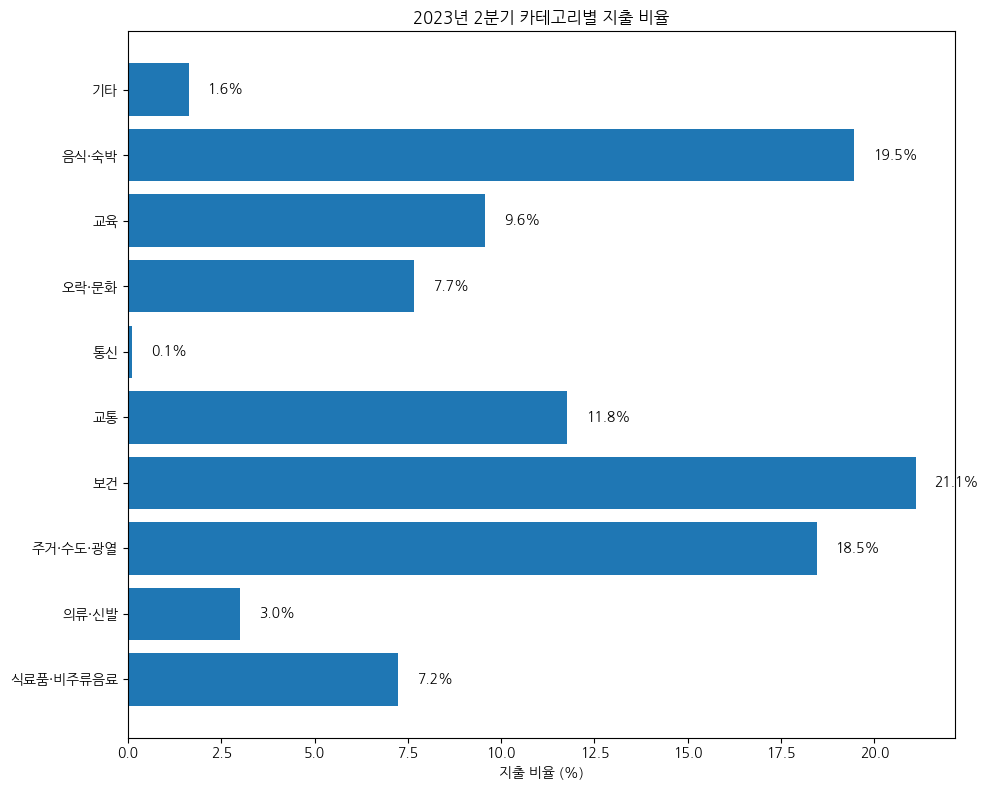


각 카테고리별 비율:
식료품·비주류음료: 7.2%
의류·신발: 3.0%
주거·수도·광열: 18.5%
보건: 21.1%
교통: 11.8%
통신: 0.1%
오락·문화: 7.7%
교육: 9.6%
음식·숙박: 19.5%
기타: 1.6%


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import platform

# 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
else:
    plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# 필요한 컬럼만 지정
needed_columns = [
    'BAS_YH',
    'GROCERY_AM', 'CLOTH_AM', 'GOODS_AM', 'ARCHIT_AM', 'BLDMNG_AM', 'SVC_AM',
    'HOS_AM', 'SANIT_AM', 'INSU_AM', 'AUTOSL_AM', 'AUTOMNT_AM', 'FUEL_AM',
    'OFFCOM_AM', 'LEISURE_S_AM', 'LEISURE_P_AM', 'CULTURE_AM', 'ACDM_AM',
    'BOOK_AM', 'RESTRNT_AM', 'HOTEL_AM', 'FUNITR_AM', 'APPLNC_AM', 'KITWR_AM'
]

dtypes = {col: 'float32' for col in needed_columns[1:]}
dtypes['BAS_YH'] = str  # string type으로 변경

# 결과값을 저장할 딕셔너리 초기화
category_sums = {
    '식료품·비주류음료': 0.0,
    '의류·신발': 0.0,
    '주거·수도·광열': 0.0,
    '보건': 0.0,
    '교통': 0.0,
    '통신': 0.0,
    '오락·문화': 0.0,
    '교육': 0.0,
    '음식·숙박': 0.0,
    '기타': 0.0
}

# 처리된 레코드 수 카운트
total_records = 0
filtered_records = 0

# chunking으로 데이터 처리
chunk_size = 100000
for chunk in pd.read_csv('/content/edu_data_F.csv', usecols=needed_columns, dtype=dtypes, chunksize=chunk_size):
    total_records += len(chunk)

    # 첫 청크의 BAS_YH 값 확인
    if total_records <= chunk_size:
        print("BAS_YH 고유값:", chunk['BAS_YH'].unique())

    # 2023Q2 데이터만 필터링
    chunk_2023q2 = chunk[chunk['BAS_YH'].str.strip() == '2023q2']  # 공백 제거 추가
    filtered_records += len(chunk_2023q2)

    print(f"처리 중: 전체 레코드 {total_records:,}개, 필터링된 레코드 {filtered_records:,}개")

    if not chunk_2023q2.empty:
        # 각 카테고리별 합산
        category_sums['식료품·비주류음료'] += chunk_2023q2['GROCERY_AM'].sum()
        category_sums['의류·신발'] += chunk_2023q2[['CLOTH_AM', 'GOODS_AM']].sum().sum()
        category_sums['주거·수도·광열'] += chunk_2023q2[['ARCHIT_AM', 'BLDMNG_AM', 'SVC_AM']].sum().sum()
        category_sums['보건'] += chunk_2023q2[['HOS_AM', 'SANIT_AM', 'INSU_AM']].sum().sum()
        category_sums['교통'] += chunk_2023q2[['AUTOSL_AM', 'AUTOMNT_AM', 'FUEL_AM']].sum().sum()
        category_sums['통신'] += chunk_2023q2['OFFCOM_AM'].sum()
        category_sums['오락·문화'] += chunk_2023q2[['LEISURE_S_AM', 'LEISURE_P_AM', 'CULTURE_AM']].sum().sum()
        category_sums['교육'] += chunk_2023q2[['ACDM_AM', 'BOOK_AM']].sum().sum()
        category_sums['음식·숙박'] += chunk_2023q2[['RESTRNT_AM', 'HOTEL_AM']].sum().sum()
        category_sums['기타'] += chunk_2023q2[['FUNITR_AM', 'APPLNC_AM', 'KITWR_AM']].sum().sum()

print("\n=== 최종 결과 ===")
print(f"전체 처리된 레코드: {total_records:,}개")
print(f"필터링된 레코드 (2023Q2): {filtered_records:,}개")

print("\n각 카테고리별 최종 합계:")
for category, amount in category_sums.items():
    print(f"{category}: {amount:,.0f}")

total_sum = sum(category_sums.values())
print(f"\n전체 합계: {total_sum:,.0f}")

if total_sum > 0:
    # 비율 계산
    category_percentages = {k: (v/total_sum)*100 for k, v in category_sums.items()}

    # 가로 누적 막대 그래프 생성
    plt.figure(figsize=(10, 8))
    bars = plt.barh(list(category_percentages.keys()), list(category_percentages.values()))
    plt.xlabel('지출 비율 (%)')
    plt.title('2023년 2분기 카테고리별 지출 비율')

    # 각 막대에 퍼센트 표시
    for bar in bars:
        plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
                 f'{bar.get_width():.1f}%', va='center')

    plt.tight_layout()
    plt.show()

    print("\n각 카테고리별 비율:")
    for category, percentage in category_percentages.items():
        print(f"{category}: {percentage:.1f}%")
else:
    print("\n경고: 데이터가 없거나 모든 값이 0입니다.")


SEQ 고유값: ['WDJXI9MJ1X41AITHZ3IU' 'BYQ21JCPWQU5748ZI7BI' 'VIJ6QPNCTMESHTMVDNAW' ...
 'HVJ6PEUE99RR8V7DW5ET' 'K4A54LB1XRKMVGM1JF9Y' 'K697EPALX85HAPYR873H']
처리 중: 전체 레코드 100,000개, 필터링된 레코드 12,611개
처리 중: 전체 레코드 200,000개, 필터링된 레코드 25,243개
처리 중: 전체 레코드 300,000개, 필터링된 레코드 37,904개
처리 중: 전체 레코드 400,000개, 필터링된 레코드 50,517개
처리 중: 전체 레코드 500,000개, 필터링된 레코드 63,127개
처리 중: 전체 레코드 600,000개, 필터링된 레코드 75,724개
처리 중: 전체 레코드 700,000개, 필터링된 레코드 88,319개
처리 중: 전체 레코드 800,000개, 필터링된 레코드 100,991개
처리 중: 전체 레코드 900,000개, 필터링된 레코드 113,568개
처리 중: 전체 레코드 1,000,000개, 필터링된 레코드 126,321개
처리 중: 전체 레코드 1,100,000개, 필터링된 레코드 138,929개
처리 중: 전체 레코드 1,200,000개, 필터링된 레코드 151,672개
처리 중: 전체 레코드 1,300,000개, 필터링된 레코드 164,190개
처리 중: 전체 레코드 1,400,000개, 필터링된 레코드 176,794개
처리 중: 전체 레코드 1,500,000개, 필터링된 레코드 189,434개
처리 중: 전체 레코드 1,600,000개, 필터링된 레코드 201,963개
처리 중: 전체 레코드 1,700,000개, 필터링된 레코드 214,702개
처리 중: 전체 레코드 1,800,000개, 필터링된 레코드 227,400개
처리 중: 전체 레코드 1,900,000개, 필터링된 레코드 239,953개
처리 중: 전체 레코드 2,000,000개, 필터링된 레코드 252,705개
처리 중: 전체 레코

처리 중: 전체 레코드 5,382,734개, 필터링된 레코드 679,833개

=== 최종 결과 ===
전체 처리된 레코드: 5,382,734개
필터링된 레코드 (2023Q2): 679,833개

분위별 레코드 수:
1분위: 0개
2분위: 0개
3분위: 0개
4분위: 0개
5분위: 0개


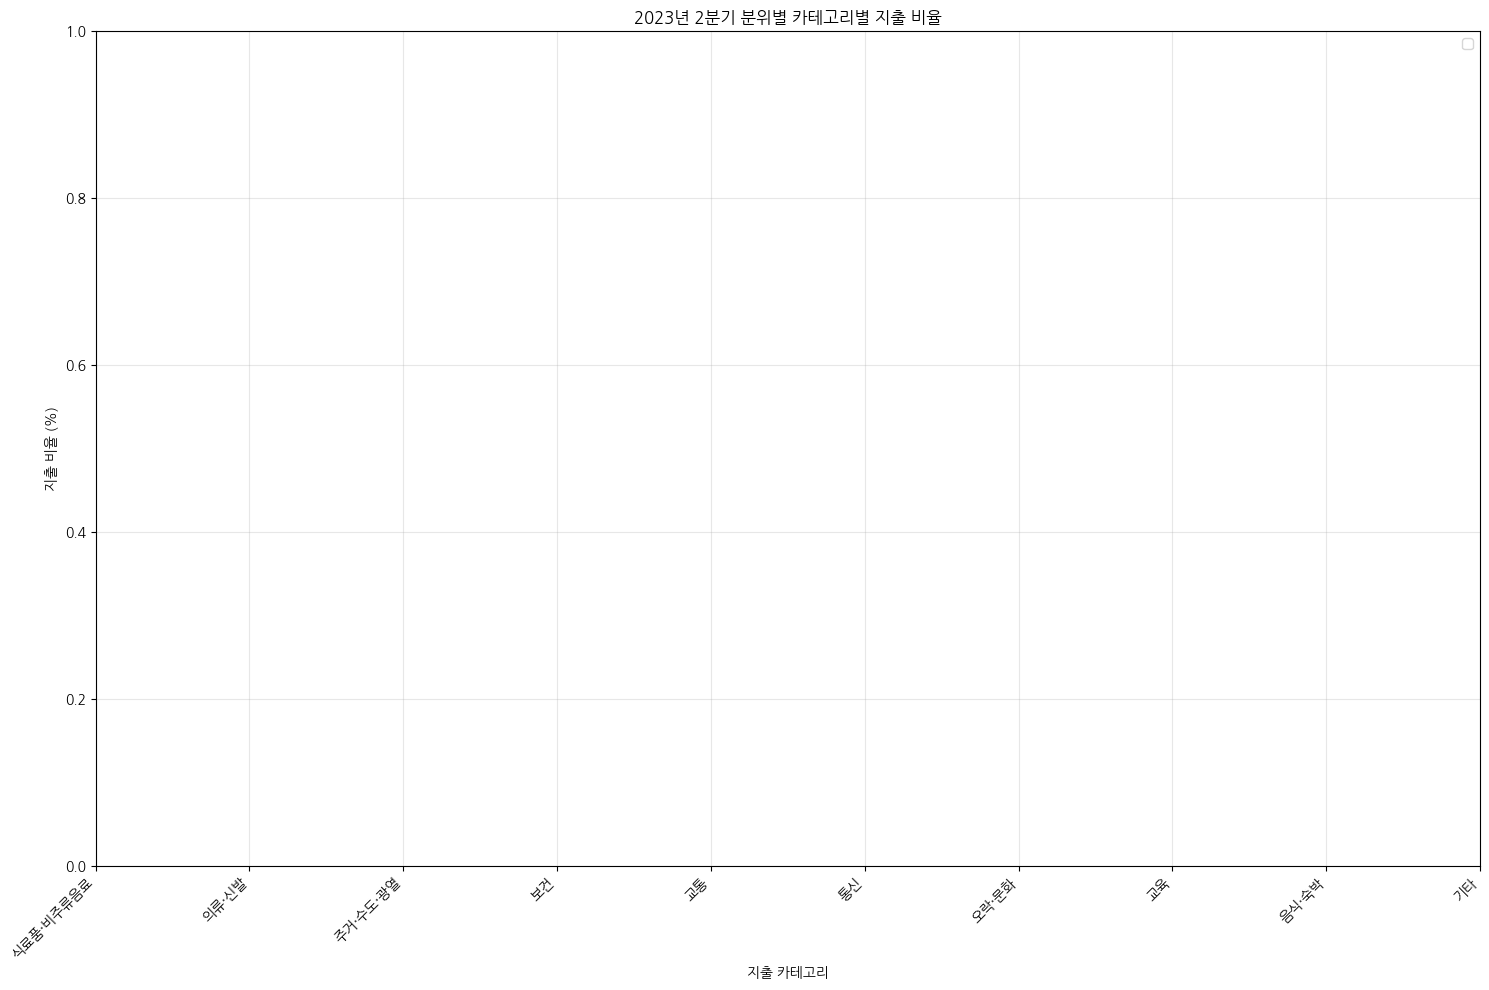

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import platform

# 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
else:
    plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# 필요한 컬럼에 SEQ 추가
needed_columns = [
    'BAS_YH', 'SEQ',  # SEQ 컬럼 추가
    'GROCERY_AM', 'CLOTH_AM', 'GOODS_AM', 'ARCHIT_AM', 'BLDMNG_AM', 'SVC_AM',
    'HOS_AM', 'SANIT_AM', 'INSU_AM', 'AUTOSL_AM', 'AUTOMNT_AM', 'FUEL_AM',
    'OFFCOM_AM', 'LEISURE_S_AM', 'LEISURE_P_AM', 'CULTURE_AM', 'ACDM_AM',
    'BOOK_AM', 'RESTRNT_AM', 'HOTEL_AM', 'FUNITR_AM', 'APPLNC_AM', 'KITWR_AM'
]

dtypes = {col: 'float32' for col in needed_columns[2:]}  # SEQ 이후의 컬럼들만 float32로 지정
dtypes['BAS_YH'] = str
dtypes['SEQ'] = str  # SEQ를 문자열로 변경

# 분위별 결과를 저장할 딕셔너리 초기화
quintile_sums = {str(i): {
    '식료품·비주류음료': 0.0,
    '의류·신발': 0.0,
    '주거·수도·광열': 0.0,
    '보건': 0.0,
    '교통': 0.0,
    '통신': 0.0,
    '오락·문화': 0.0,
    '교육': 0.0,
    '음식·숙박': 0.0,
    '기타': 0.0
} for i in range(1, 6)}  # 1~5분위

# 분위별 카운트를 저장할 딕셔너리
quintile_counts = {str(i): 0 for i in range(1, 6)}

# 처리된 레코드 수 카운트
total_records = 0
filtered_records = 0

# chunking으로 데이터 처리
chunk_size = 100000
for chunk in pd.read_csv('/content/edu_data_F.csv', usecols=needed_columns, dtype=dtypes, chunksize=chunk_size):
    total_records += len(chunk)

    # 첫 청크의 SEQ 값 확인
    if total_records <= chunk_size:
        print("SEQ 고유값:", chunk['SEQ'].unique())

    # 2023Q2 데이터만 필터링
    chunk_2023q2 = chunk[chunk['BAS_YH'].str.strip() == '2023q2']
    filtered_records += len(chunk_2023q2)

    print(f"처리 중: 전체 레코드 {total_records:,}개, 필터링된 레코드 {filtered_records:,}개")

    if not chunk_2023q2.empty:
        # 각 분위별로 처리
        for quintile in range(1, 6):
            quintile_data = chunk_2023q2[chunk_2023q2['SEQ'] == str(quintile)]
            quintile_counts[str(quintile)] += len(quintile_data)

            if not quintile_data.empty:
                # 각 카테고리별 합산
                quintile_sums[str(quintile)]['식료품·비주류음료'] += quintile_data['GROCERY_AM'].sum()
                quintile_sums[str(quintile)]['의류·신발'] += quintile_data[['CLOTH_AM', 'GOODS_AM']].sum().sum()
                quintile_sums[str(quintile)]['주거·수도·광열'] += quintile_data[['ARCHIT_AM', 'BLDMNG_AM', 'SVC_AM']].sum().sum()
                quintile_sums[str(quintile)]['보건'] += quintile_data[['HOS_AM', 'SANIT_AM', 'INSU_AM']].sum().sum()
                quintile_sums[str(quintile)]['교통'] += quintile_data[['AUTOSL_AM', 'AUTOMNT_AM', 'FUEL_AM']].sum().sum()
                quintile_sums[str(quintile)]['통신'] += quintile_data['OFFCOM_AM'].sum()
                quintile_sums[str(quintile)]['오락·문화'] += quintile_data[['LEISURE_S_AM', 'LEISURE_P_AM', 'CULTURE_AM']].sum().sum()
                quintile_sums[str(quintile)]['교육'] += quintile_data[['ACDM_AM', 'BOOK_AM']].sum().sum()
                quintile_sums[str(quintile)]['음식·숙박'] += quintile_data[['RESTRNT_AM', 'HOTEL_AM']].sum().sum()
                quintile_sums[str(quintile)]['기타'] += quintile_data[['FUNITR_AM', 'APPLNC_AM', 'KITWR_AM']].sum().sum()

print("\n=== 최종 결과 ===")
print(f"전체 처리된 레코드: {total_records:,}개")
print(f"필터링된 레코드 (2023Q2): {filtered_records:,}개")

print("\n분위별 레코드 수:")
for quintile, count in quintile_counts.items():
    print(f"{quintile}분위: {count:,}개")

# 각 분위별 비율 계산 및 시각화
plt.figure(figsize=(15, 10))

for quintile in range(1, 6):
    quintile_str = str(quintile)
    total_sum = sum(quintile_sums[quintile_str].values())
    if total_sum > 0:
        percentages = {k: (v/total_sum)*100 for k, v in quintile_sums[quintile_str].items()}

        print(f"\n{quintile}분위 카테고리별 비율:")
        for category, percentage in percentages.items():
            print(f"{category}: {percentage:.1f}%")

# 모든 분위의 데이터를 하나의 그래프로 시각화
categories = list(quintile_sums['1'].keys())
x = range(len(categories))
width = 0.15

for i in range(1, 6):
    quintile_str = str(i)
    total_sum = sum(quintile_sums[quintile_str].values())
    if total_sum > 0:
        percentages = [quintile_sums[quintile_str][cat]/total_sum*100 for cat in categories]
        plt.bar([xi + width*(i-3) for xi in x], percentages, width, label=f'{i}분위')

plt.xlabel('지출 카테고리')
plt.ylabel('지출 비율 (%)')
plt.title('2023년 2분기 분위별 카테고리별 지출 비율')
plt.xticks(x, categories, rotation=45, ha='right')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()